In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

# Load the dataset
file_path = '../point_cloud_data/6DoF-HMD-UserNavigationData-master/NavigationData/H4_nav.csv'
data = pd.read_csv(file_path)





In [2]:
data.head()

,FrameNumber,HMDPX,HMDPY,HMDPZ,HMDRX,HMDRY,HMDRZ,Participant,Dataset,ViewFrame
0,1,0.0346,1.7656,-0.9146,13.7244,356.0449,346.6967,P01_V1,H4,1
1,2,0.0341,1.7666,-0.9166,13.6143,356.4417,351.0183,P01_V1,H4,2
2,3,0.0333,1.7668,-0.9189,13.6143,356.6888,354.1861,P01_V1,H4,3
3,4,0.0325,1.7664,-0.9209,13.3849,356.7282,355.7287,P01_V1,H4,4
4,5,0.0320,1.7664,-0.9220,13.3269,356.6877,356.4001,P01_V1,H4,5


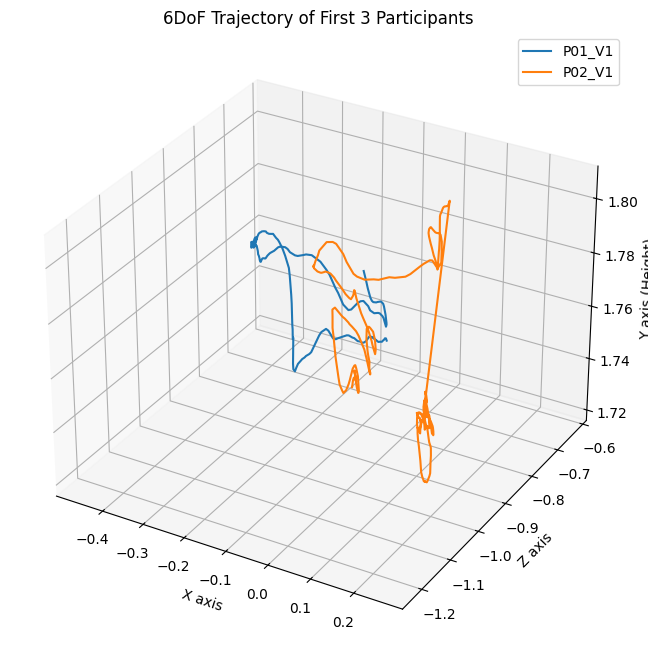

In [3]:
# Filter data for the first three participants
participants = data['Participant'].unique()[0:2]
filtered_data = data[data['Participant'].isin(participants)]

# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the trajectory for each of the first three participants
for participant in participants:
    participant_data = filtered_data[filtered_data['Participant'] == participant]
    ax.plot(participant_data['HMDPX'], participant_data['HMDPZ'], participant_data['HMDPY'], label=participant)

# Setting the labels and title
ax.set_xlabel('X axis')
ax.set_ylabel('Z axis')
ax.set_zlabel('Y axis (Height)')
ax.set_title('6DoF Trajectory of First 3 Participants')

# Limiting the axes for better visualization
# ax.set_xlim([-2, 1])
# ax.set_ylim([0, 1.5])
# ax.set_zlim([0, 2])

ax.legend()

# Show the plot
plt.show()

# video 2

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


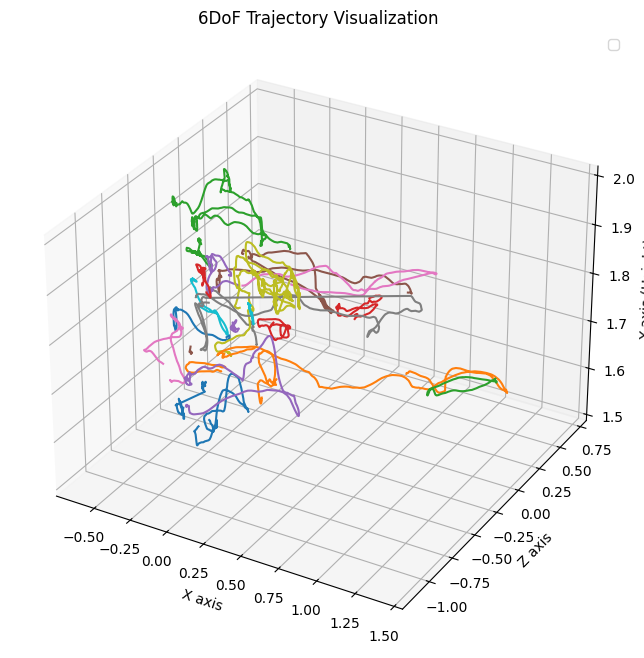

In [17]:
# Load the dataset
file_path = '../point_cloud_data/6DoF-HMD-UserNavigationData-master/NavigationData/H2_nav.csv'
data = pd.read_csv(file_path)
# Filter data for the first three participants
participants = data['Participant'].unique()
# remove Participant P16_V1
participants = participants[participants != 'P06_V1']
filtered_data = data[data['Participant'].isin(participants)]


# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the trajectory for each of the first three participants
for participant in participants:
    participant_data = filtered_data[filtered_data['Participant'] == participant]
    ax.plot(participant_data['HMDPX'], participant_data['HMDPZ'], participant_data['HMDPY'])
    # ax.plot(participant_data['HMDPX'], participant_data['HMDPZ'], participant_data['HMDPY'], label=participant)

# Setting the labels and title
ax.set_xlabel('X axis')
ax.set_ylabel('Z axis')
ax.set_zlabel('Y axis (Height)')
ax.set_title('6DoF Trajectory Visualization')

# Limiting the axes for better visualization
# ax.set_xlim([-2, 1])
# ax.set_ylim([0, 1.5])
# ax.set_zlim([0, 2])

ax.legend()

# Show the plot
plt.show()

# all trajectory from different videos

In [1]:
# Load the dataset
def visualization_fov(vid=1):
    file_path = './6DoF-HMD-UserNavigationData-master/NavigationData/H'+str(vid)+'_nav.csv'
    data = pd.read_csv(file_path)
    # Filter data for the first three participants
    # participants = data['Participant'].unique()[:3]
    participants = participants[participants != 'P06_V1']
    filtered_data = data[data['Participant'].isin(participants)]

    # Create a 3D plot
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Plot the trajectory for each of the first three participants
    for participant in participants:
        participant_data = filtered_data[filtered_data['Participant'] == participant]
        ax.plot(participant_data['HMDPX'], participant_data['HMDPZ'], participant_data['HMDPY'], label=participant)

    # Setting the labels and title
    ax.set_xlabel('X axis')
    ax.set_ylabel('Z axis')
    ax.set_zlabel('Y axis (Height)')
    ax.set_title('(x,y,z) Trajectory of different Participants on Video '+str(vid))

    # Limiting the axes for better visualization
    # ax.set_xlim([-2, 1])
    # ax.set_ylim([0, 1.5])
    # ax.set_zlim([0, 2])

    ax.legend()

    # Show the plot
    plt.show()

In [2]:
visualization_fov(1)

NameError: name 'pd' is not defined

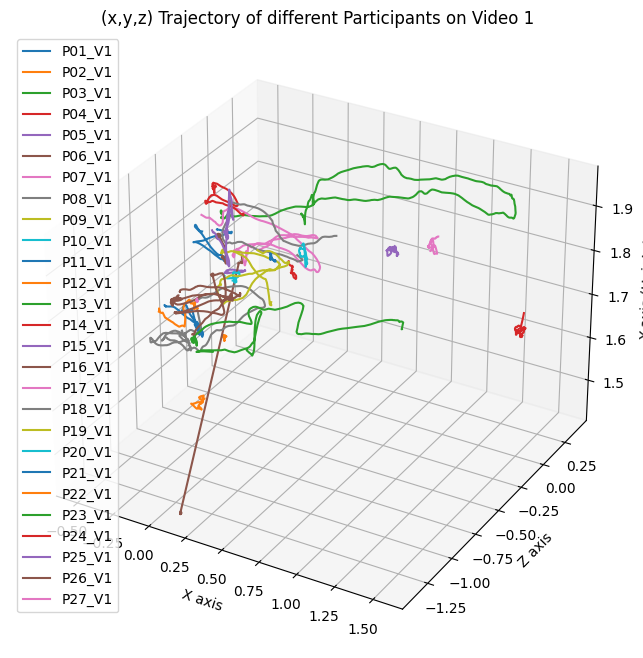

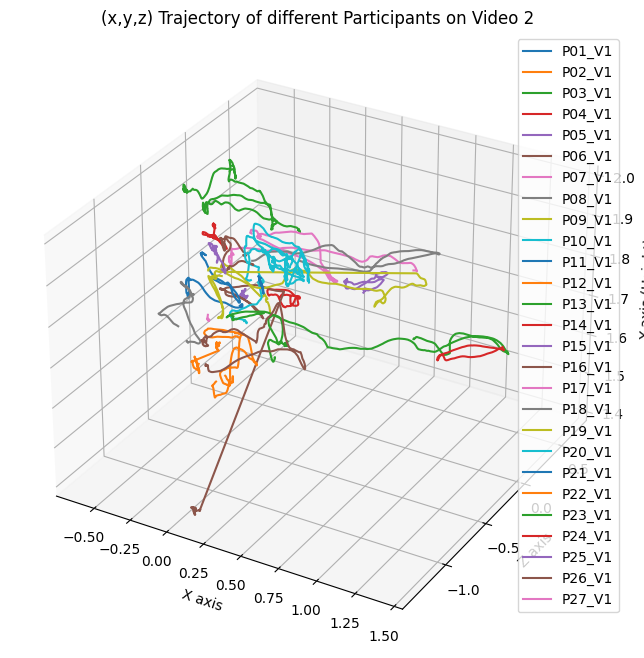

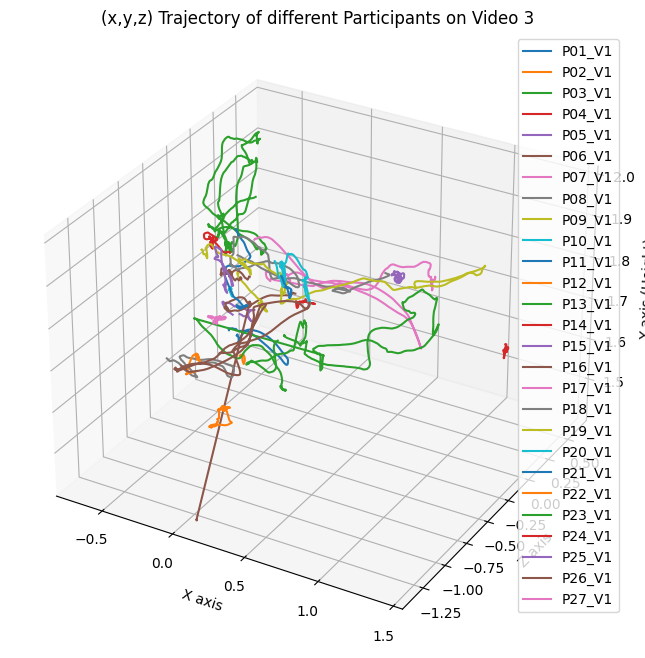

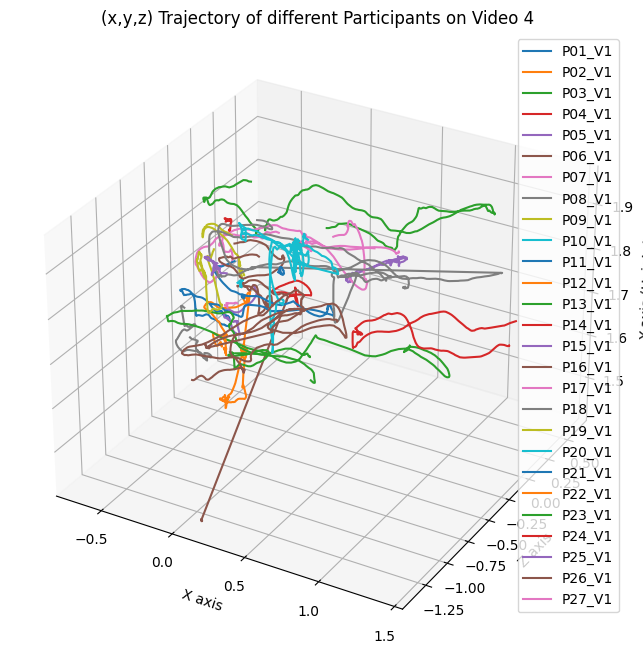

In [ ]:
visualization_fov(1)
visualization_fov(2)
visualization_fov(3)
visualization_fov(4)

(549, 10)


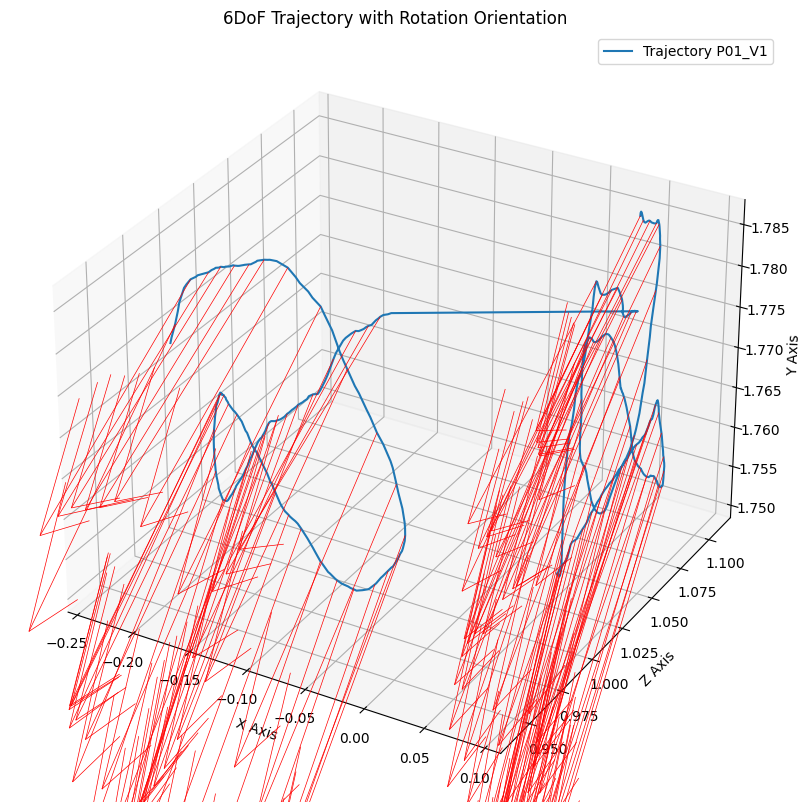

In [7]:
# Adjusting the approach to plot trajectory with rotation orientation using arrows
from mpl_toolkits.mplot3d import Axes3D
import numpy as np


# Load the dataset
file_path = './6DoF-HMD-UserNavigationData-master/NavigationData/H1_nav.csv'
data = pd.read_csv(file_path)
# Filter data for the first three participants
# participants = data['Participant'].unique()[:27]
def plot_trajectory_with_orientation(data, participants):
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111, projection='3d')
    # data = data.head()
    # Sampling rate for arrows to avoid clutter
    sample_rate =5

    for participant in participants:
        # Filter data for the current participant
        part_data = data[data['Participant'] == participant]
        print(part_data.shape)
        # Plotting the trajectory
        ax.plot(part_data['HMDPX'], -part_data['HMDPZ'], part_data['HMDPY'], label=f'Trajectory {participant}')

        # Sampling for arrow plotting to represent orientation
        # import pdb;pdb.set_trace()
        sampled_data = part_data.iloc[::sample_rate, :]
        # sampled_data = part_data.iloc[:,0]
        for _, row in sampled_data.iterrows():
            # Convert rotation angles from degrees to radians
            yaw, pitch, roll = np.radians(row['HMDRY']), np.radians(row['HMDRX']), np.radians(row['HMDRZ'])

            # Calculating direction vectors for the arrows based on rotation
            # Assuming a fixed arrow length for visualization
            arrow_length = 0.1
            dx = -arrow_length * np.sin(yaw) * np.cos(pitch)
            dy = - arrow_length * np.sin(pitch)  #because we have left handed
            dz = arrow_length * np.cos(pitch) * np.cos(yaw)
            # print(row['HMDRY'],row['HMDRX'],row['HMDRZ'])
            # print(yaw,pitch,roll)
            # print(dx,dz,dy)
            # Plotting the arrows to represent orientation
            ax.quiver(row['HMDPX'], -row['HMDPZ'], row['HMDPY'], dx, -dz, dy,color='red',  arrow_length_ratio=0.3, linewidth=0.5)

    ax.set_xlabel('X Axis')
    ax.set_ylabel('Z Axis')
    ax.set_zlabel('Y Axis')
    ax.set_title('6DoF Trajectory with Rotation Orientation')
    # ax.invert_xaxis()  # Flips the X axis
    # ax.invert_yaxis()  # Flips the Y axis
    # Limiting the axes for better visualization
    # ax.set_xlim([-0.5, 0.])
    # ax.set_ylim([1, 1.6])
    # ax.set_zlim([0, 2])
    ax.legend()

    plt.show()

# Plotting with corrected approach
plot_trajectory_with_orientation(data, data['Participant'].unique()[0:1])


# final result with direction and object 

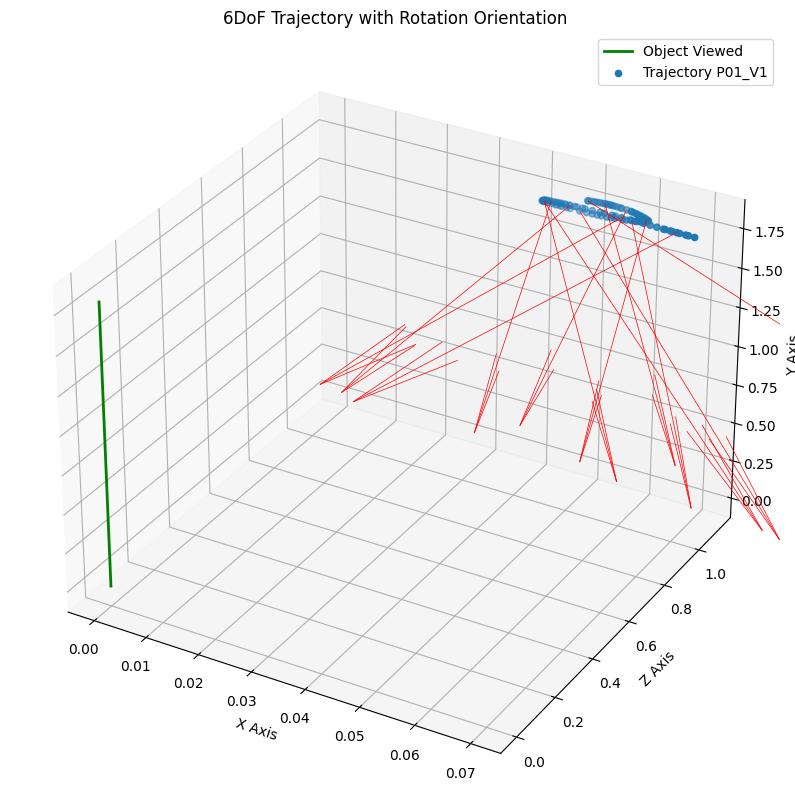

In [8]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd

# Make sure to adjust the file_path to the actual location of your CSV file
file_path = './6DoF-HMD-UserNavigationData-master/NavigationData/H1_nav.csv'
data = pd.read_csv(file_path)

def plot_trajectory_with_orientation(data, participants):
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111, projection='3d')

    # Adding a vertical line at x=0, z=0 with a height of 1.8
    # Since Z is used as the vertical axis in the provided code, we adjust accordingly
    line_x = [0, 0]
    line_y = [0, 0]
    line_z = [0, 1.8]
    ax.plot(line_x, line_y, line_z, color='green', linewidth=2, label='Object Viewed')

    sample_rate = 10

    for participant in participants:
        part_data = data[data['Participant'] == participant]
        part_data = part_data[5:120]
        ax.scatter(part_data['HMDPX'], -part_data['HMDPZ'], part_data['HMDPY'], label=f'Trajectory {participant}')

        sampled_data = part_data.iloc[::sample_rate, :]
        for _, row in sampled_data.iterrows():
            yaw, pitch, roll = np.radians(row['HMDRY']), np.radians(row['HMDRX']), np.radians(row['HMDRZ'])

            arrow_length = 1
            dx = -arrow_length * np.sin(yaw) * np.cos(pitch)
            dy = -arrow_length * np.sin(pitch)  # Adjusted for left-handed coordinate system
            dz = arrow_length * np.cos(pitch) * np.cos(yaw)

            ax.quiver(row['HMDPX'], -row['HMDPZ'], row['HMDPY'], dx, -dz, dy, color='red', arrow_length_ratio=0.3, linewidth=0.5)

    ax.set_xlabel('X Axis')
    ax.set_ylabel('Z Axis')
    ax.set_zlabel('Y Axis')
    ax.set_title('6DoF Trajectory with Rotation Orientation')
    ax.legend()

    plt.show()

# Plotting with the corrected approach
# Adjust the participant selection as necessary
plot_trajectory_with_orientation(data, data['Participant'].unique()[0:1])


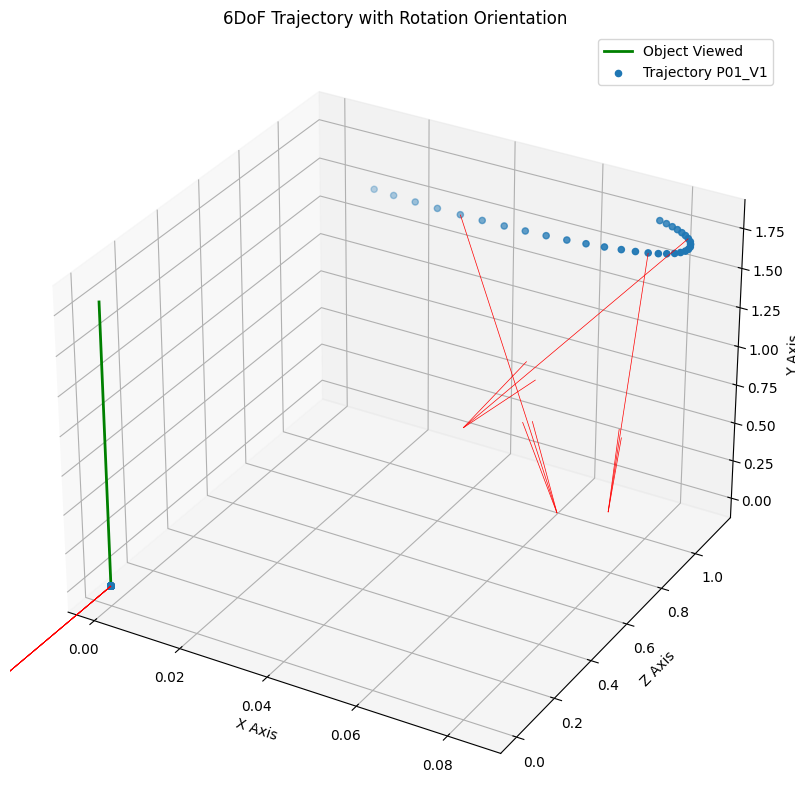

In [9]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd

# Make sure to adjust the file_path to the actual location of your CSV file
file_path = './6DoF-HMD-UserNavigationData-master/NavigationData/H1_nav_pred1.csv'
data = pd.read_csv(file_path)

def plot_trajectory_with_orientation(data, participants):
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111, projection='3d')

    # Adding a vertical line at x=0, z=0 with a height of 1.8
    # Since Z is used as the vertical axis in the provided code, we adjust accordingly
    line_x = [0, 0]
    line_y = [0, 0]
    line_z = [0, 1.8]
    ax.plot(line_x, line_y, line_z, color='green', linewidth=2, label='Object Viewed')

    sample_rate = 10

    for participant in participants:
        part_data = data[data['Participant'] == participant]
        part_data = part_data[5:120]
        ax.scatter(part_data['HMDPX'], -part_data['HMDPZ'], part_data['HMDPY'], label=f'Trajectory {participant}')

        sampled_data = part_data.iloc[::sample_rate, :]
        for _, row in sampled_data.iterrows():
            # import pdb;pdb.set_trace()
            yaw, pitch, roll = np.radians(row['HMDRY']), np.radians(row['HMDRX']), np.radians(row['HMDRZ'])

            arrow_length = 1
            dx = -arrow_length * np.sin(yaw) * np.cos(pitch)
            dy = -arrow_length * np.sin(pitch)  # Adjusted for left-handed coordinate system
            dz = arrow_length * np.cos(pitch) * np.cos(yaw)

            ax.quiver(row['HMDPX'], -row['HMDPZ'], row['HMDPY'], dx, -dz, dy, color='red', arrow_length_ratio=0.3, linewidth=0.5)

    ax.set_xlabel('X Axis')
    ax.set_ylabel('Z Axis')
    ax.set_zlabel('Y Axis')
    ax.set_title('6DoF Trajectory with Rotation Orientation')
    ax.legend()

    plt.show()

# Plotting with the corrected approach
# Adjust the participant selection as necessary
plot_trajectory_with_orientation(data, data['Participant'].unique()[0:1])


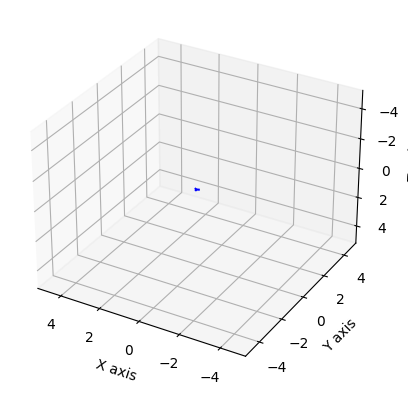

In [10]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a new figure for plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Define the origin
origin = [0, 0, 0]

# Vector to plot (for example, pointing to (5, 5, 5))
vector = [5, 5, 5]

# Plotting the vector
ax.quiver(*origin, *vector, color='b', length=1, normalize=True)

# Setting the labels for each axis
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

# Setting the range for each axis
ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])
ax.set_zlim([-5, 5])
ax.invert_xaxis()  # Flips the X axis
# ax.invert_yaxis()  # Flips the X axis
ax.invert_zaxis()
# Display the plot
plt.show()


In [11]:
from math import sin, cos, radians

# Define the yaw, pitch, and roll angles in degrees
yaw_deg = 45
pitch_deg = 45
roll
# Convert angles to radians for calculation
yaw_rad = radians(yaw_deg)
pitch_rad = radians(pitch_deg)

# Assuming a unit vector (r = 1) and ignoring roll for direction calculation
r = 1
X = r * cos(pitch_rad) * sin(yaw_rad)
Y = r * sin(pitch_rad)
Z = r * cos(pitch_rad) * cos(yaw_rad)

# The direction vector e after applying yaw and pitch
e = (X, Y, Z)
e
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(0,0,0)
ax.quiver(0,0,0, X,Y,X, color='red', arrow_length_ratio=0.3, linewidth=0.5)
plt.show()

NameError: name 'roll' is not defined

# Attempting a simplified approach to include rotation information with arrows, focusing on Y-axis rotation for clarity
participants = data['Participant'].unique()[5:6]
def plot_trajectory_with_simple_rotation(data, participants):
    fig = plt.figure(figsize=(14, 10))
    ax = fig.add_subplot(111, projection='3d')

    # Loop through each participant
    for participant in participants:
        part_data = data[data['Participant'] == participant]
        
        # Plot the trajectory
        ax.plot(part_data['HMDPX'], part_data['HMDPZ'], part_data['HMDPY'], label=f'Participant {participant}')
        
        # Sampling points to place arrows
        sample_every = 20  # Sample every 20 points for clarity
        for i in range(0, len(part_data), sample_every):
            row = part_data.iloc[i]
            
            # Arrow direction based on Y rotation (simplifying assumption)
            # Convert degrees to radians for direction calculation
            angle_y = np.radians(row['HMDRY'])
            dx = np.sin(angle_y)
            dz = np.cos(angle_y)
            
            # Adding arrow to represent direction based on Y rotation
            ax.quiver(row['HMDPX'], row['HMDPZ'], row['HMDPY'], dx, 0, dz, length=0.1, color='red', alpha=0.5)

    ax.set_xlabel('X Axis')
    ax.set_ylabel('Z Axis')
    ax.set_zlabel('Y Axis (Height)')
    ax.set_title('6DoF Trajectory with Simplified Y-axis Rotation')
    ax.legend()

    plt.show()

plot_trajectory_with_simple_rotation(filtered_data, participants)
